This notebook is intended to do the postprocessing of the data obtained from the C++ code on QLB. It creates the plots and animations for the visualization of the different results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [16]:
#%matplotlib inline
i1 = 0
i2 = 600
i3 = 1200
i4 = 5000
num1 = format(i1,'04d')
num2 = format(i2,'04d')
num3 = format(i3,'04d')
num4 = format(i4,'04d')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x1,y1 = np.loadtxt("../data/rho_sil_" + num1 + ".dat", unpack=True)
x2,y2 = np.loadtxt("../data/rho_sil_" + num2 + ".dat", unpack=True)
x3,y3 = np.loadtxt("../data/rho_sil_" + num3 + ".dat", unpack=True)
x4,y4 = np.loadtxt("../data/rho_sil_" + num4 + ".dat", unpack=True)
plot1 = plt.plot(x1,y1,'-.', label="t = 0",lw=2.5)
#plot2 = plt.plot(x2,y2,':', label="t = 600", lw=2.5)
plot3 = plt.plot(x3,y3,':', label="t = 1200", lw=2.5)
plot4 = plt.plot(x4,y4,'--', label="t = 5000", lw=2.5)
plot5 = plt.plot((683, 683), (0, 0.016), 'k-', lw=3)
plot6 = plt.plot((1365, 1365), (0, 0.016), 'k-', label="Potential Well",lw=3)
plt.legend()
plt.xlim(0,2048)
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi^2$')
#plt.hold(True)
#x,y = np.loadtxt("../data/CA_t1000.dat", unpack=True)
#plt.plot(x,y)
#plt.hold(True)
#x,y = np.loadtxt("../data/CA_t2000.dat", unpack=True)
#plt.plot(x,y)
plt.grid(True)
plt.savefig("wavepacket_t2000.pdf", dpi=200)
plt.show()

In [29]:
# Para ver como se mueve el máximo
for i in range(0,1999):
    num = format(i,'04d')
    x,y = np.loadtxt("../data/rho_sil_" + num + ".dat", unpack=True)
    temp = np.where(y==y.max())
    temp=temp[0]
print(temp)

[1222]


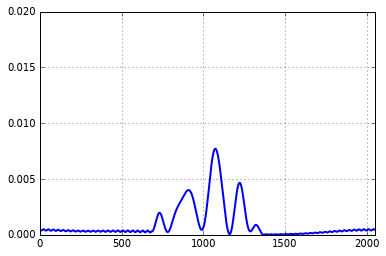

In [60]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2048), ylim=(0,0.02))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    num = format(i,'04d')
    x, y = np.loadtxt("../data/rho_sil_" + num + ".dat",unpack=True)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=20, blit=True)

plt.grid(True)
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('../animations/animation_squarewell.mp4', fps=120, extra_args=['-vcodec', 'libx264'])
#anim.save('MovWave.mpeg', writer="ffmpeg")


#plt.show()